# COMP5329 - Deep Learning

## Tutorial - Generative Adversarial Networks

adin6536@uni.sydney.edu.au

**Semester 1, 2022**

**Objectives:**

* To understand the generaitve adversarial networks(GANs).
* To become familiar with algorithm of training GANs.


**Instructions:**

* Go to File->Open. Drag and drop "10-GANs-torch.ipynb" file to the home interface and click upload.
* Read the code and complete the exercises.
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.

Lecturer: Chang Xu


# Generative Model

$$P(Y|X)$$

$$P(X)$$


$$P(X|Y)$$

## Density Estimation



```
# This is formatted as code
```

Given $X \sim \mathcal{N}(\mu, σ)$, How to get the $P(X)$ without referring to $\mu, σ$?


We can easily know the form of Gaussian density distribution is that:
$$f(x) = \frac{1}{σ  \sqrt{2 π}}e^{\frac{-1}{2}(\frac{x - μ}{σ})^2}$$

But without refering to $\mu$ and $\sigma$, how to calculate the $f(x)$?

Convert to probability mass function

![image.png](https://machinelearningmastery.com/wp-content/uploads/2019/08/Data-Sample-Histogram-with-Probability-Density-Function-Overlay-for-the-Normal-Distribution.png)

What we expect

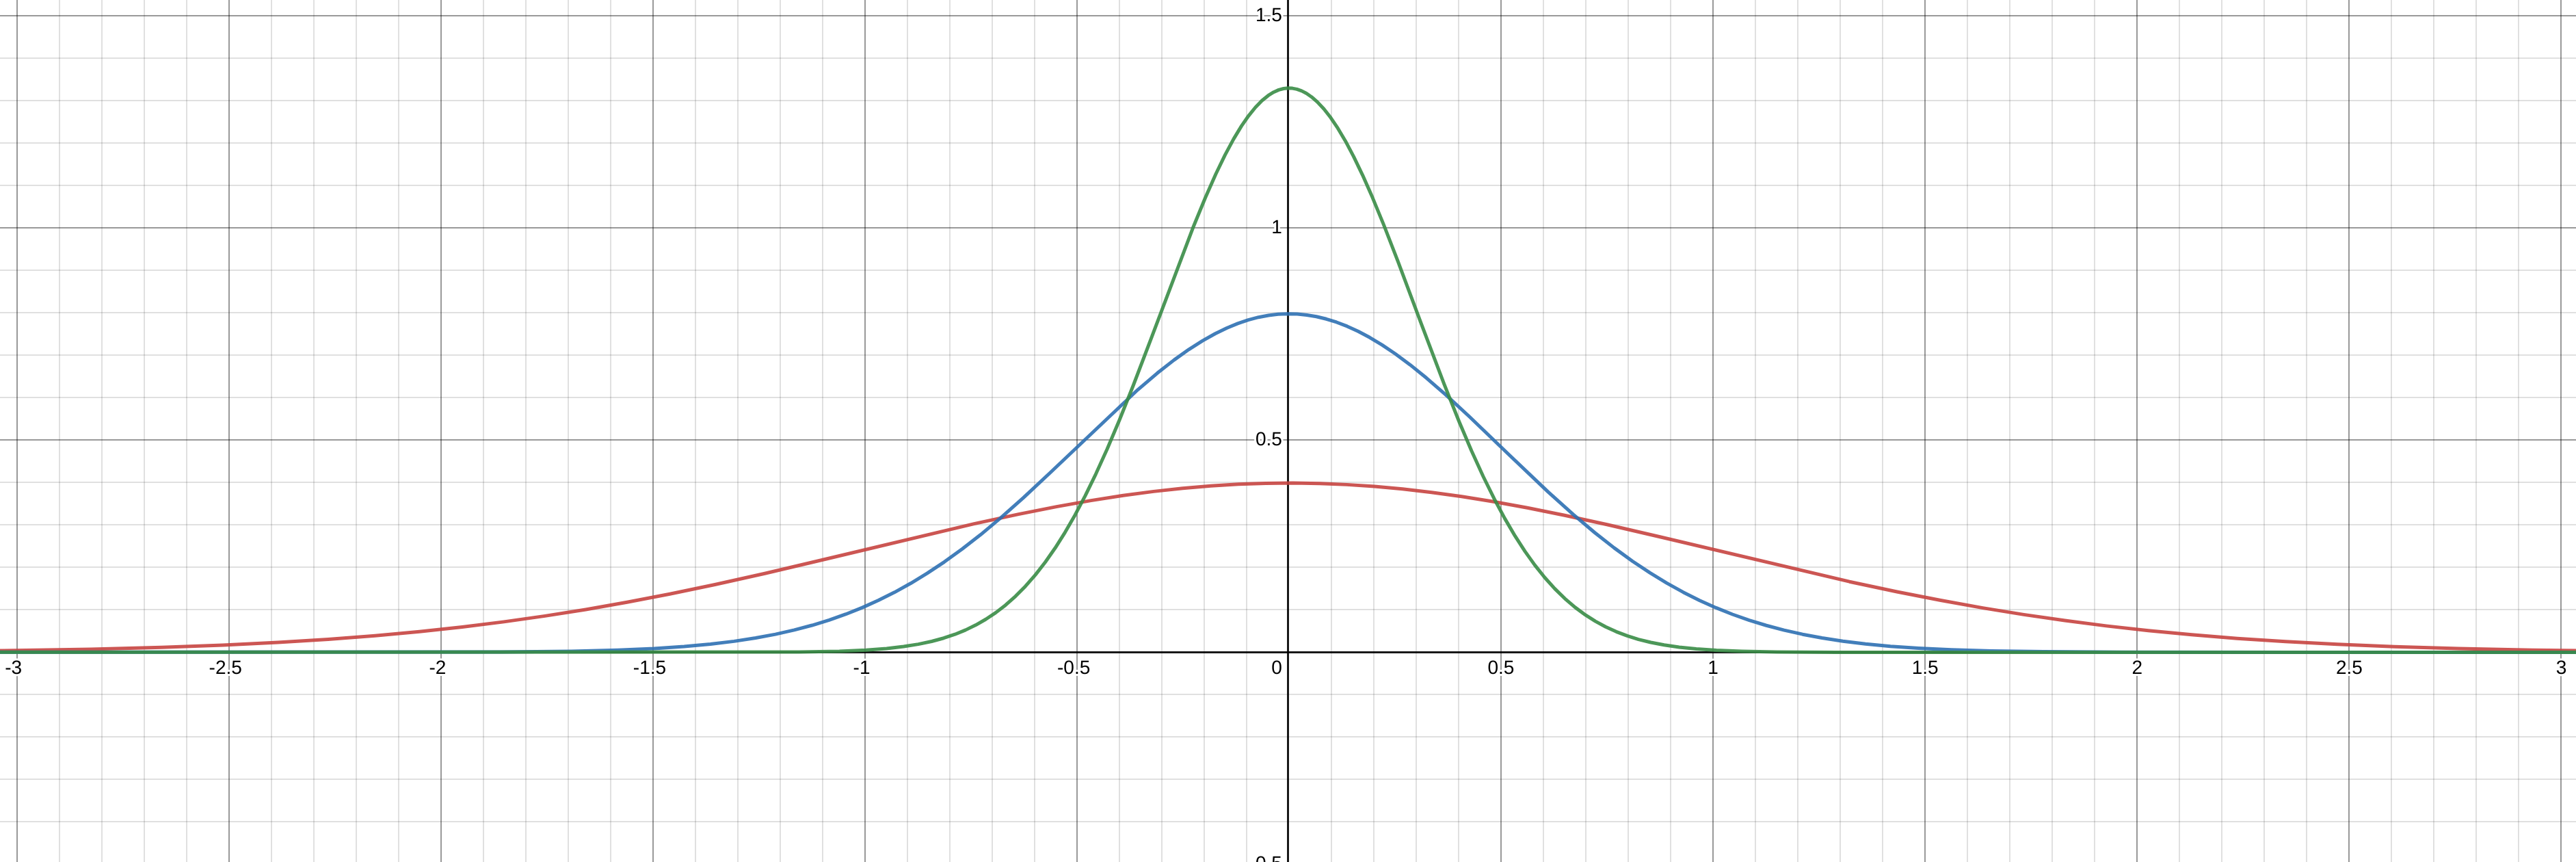

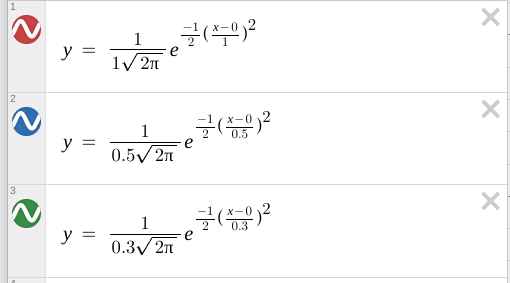

We have to estimate the $\mu$ and the variance $σ$ by ourselves.

X has 1 dimension

$$\hat{\mu} = \frac{∑ X}{N}$$

$$\hat{σ} = \frac{\sum (X - \hat{μ})^2}{N}$$

$\hat{\mu}$ and $\hat{σ}$ has the shape of 1

Multi-variate cases: N samples each has m variables

$$\hat{μ}  = \frac{\sum X}{N}$$

$\hat{μ}$ has the shape of $m$.

$$\hat{\Sigma}(X^i, X^j)  = \frac{∑(X^i - \hat{\mu}^i) (X^j - \hat{\mu}^j)}{N}$$

$\hat{\Sigma}$ has the shape of $m \times m$.


## Sampling from Density function

Given $\mu$ and $\sigma$ or $Σ$, how to sample the $X$ satisfying $$f(x) = \frac{1}{σ  \sqrt{2 π}}e^{\frac{-1}{2}(\frac{x - μ}{σ})^2}$$

### Rejection sampling

We just put uniform samples, and reject samples according to the density

### Langevin sampling

[link](https://perceptron.blog/langevin-dynamics/#:~:text=The%20Langevin%20Equation%20for%20Brownian,and%20t%20is%20the%20time.)



$$\mathcal{N}(0, I)$$

$$X_{t+1} = X_{t} + \nabla \log P(X_t) \epsilon + \sqrt{2ϵ} z$$

$z \sim \mathcal{N}(0, I)$

### Reparameterization trick

$$X = \mu + z * σ$$

$z \sim \mathcal{N}(0, I)$

##Generative Model

Same as before
1. Density estimation
2. From the density to sample

With assumption that:
1. We don't know the type of distribution
2. We are only able to access datasets

Go back a little bit, with known distribution, it is not necessary to only estimate $\mu$ and $σ$.

We can learn the set of parameters $W$ so that:

$$X * W = f(x) $$

This is very close to what we have learned before in the Deep Learning course.

The question is: how to get the $f(x)$?

# Generative Adversarial Networks

Generative Adversarial Networks are a set of models that basically learn to create synthetic data that is similar to input data it's given. In more formal terms, a GAN is a generative model that learns the probability distribution (or data distribution) of the training examples it is given. From this distribution, we can then create sample outputs. In this class of tutorial, we’ll be creating a GAN that learns to generate synthetic, yet readable, images of MNIST digits.

Come back to our last equation:

$$X * W = f(x)$$

GANs do one more things to make the sampling step easy, he has two equations:

1. $$\hat{X} * W1 = f(x)$$
2. $$z * W2 = \hat{X}$$

with $z \sim \mathcal{N}(0, I)$. Then I will optimize the W1 and W2 at the same time.



z = 0.5


0.5 * W2 = 0.3, 0.4, 0.1

## BUT WE STILL DON'T HAVE $f(x)$

Since $f(x)$ is difficult to obtain. We approximate it by using the real samples $X$.

I will label the data:

$\hat{X}$ has the label as $0$ and $X$ has the label as $1$

We try to learn $W_1$ so that:
1. $\hat{X} * W_1 = 0$
2. $X * W_1 = 1$

This results in the **discriminator**

But we want the $\hat{X}$ as close as possible to $X$, so we have to learn the $W_2$ so that
1. $z * W2 * W1 = 1$ (Remeber $W_1$ is constant now)
  
  -> $\hat{X} * W1 = 1$

This results in the objective of **generator**

When X^ -> X
X^ * W1 -> 1

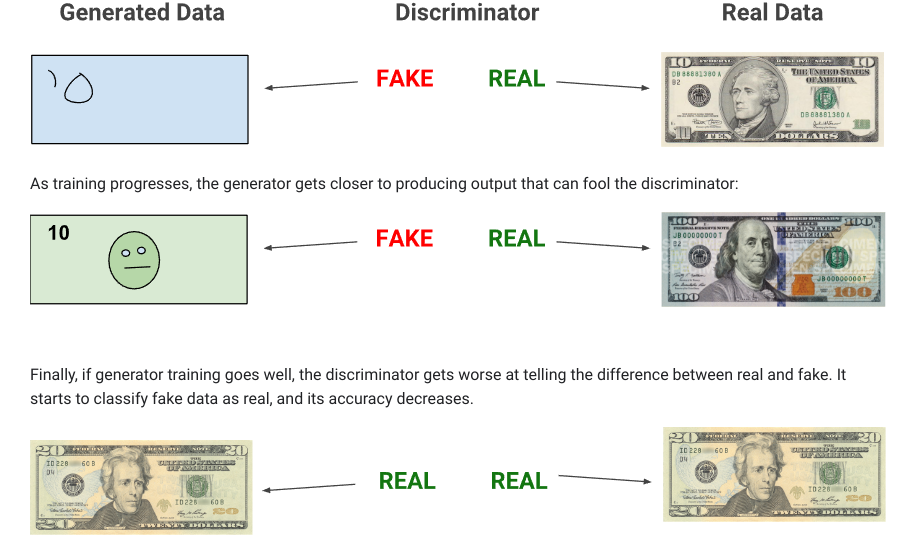

## GANs Architecture

The basic idea of these networks is that you have 2 models, a generative model and a discriminative model.

A GAN consists of two neural networks, $\mathcal{D}$ and $\mathcal{G}$. The network $\mathcal{G}$ is called a generator, and the network $D$ is called a discriminator. In the simplest case, our data consists of a set $\mathcal{D}$ of unlabeled data points (for example, images). The goal of the generator is to take random noise as an input and produce an output that "looks real," as if it came from $\mathcal{D}$. The goal of the discriminator is to take an input and decide whether it came from a generator network or a real data set. We train these networks together, with the hope (often misplaced) that each network will force the other to improve, with the end result that the generator learns to generate highly realistic outputs that consistently "fool" the discriminator.

![image.png](https://developers.google.com/static/machine-learning/gan/images/gan_diagram.svg)

Train discriminator

$$X, \quad Y = 1$$

$$\hat{X}, \quad Y = 0$$

$$D(X) -> \hat{Y}$$

-> $$CE(\hat{Y}, Y)$$
______________________________________________________________________
Fix D, Train the generator G

$G(z) -> \hat{X}$

$$\hat{X}, \quad Y = 1$$
$$X, \quad Y = 1$$

$$D(X) -> \hat{Y}$$

-> $$CE(\hat{Y}, Y)$$
___________________________________
$$D(G(z)) -> \hat{Y}$$

X is real data
z is random noise 0.2 0.3 0.9

G(z) -> X^

D(X) -> 1
D(X^) -> 0
---> used for training D (G is fixed)


D(G(z)) -> 1 => D(X^) = 1

----> used for training G (D is fixed)





## Our Task

we’re going to create a GAN that will generate MNIST digits that can fool even the best classifiers (and humans too of course). Here’s what we’re going to need:
- Real MNIST training images
- A generator network that takes in a random noise vector and produces a synthetic image
- A discriminator network (a CNN) that learns to distinguish between real and synthetic images. You can think of it as just a binary classifier (1 for real image, 0 for fake)
- An optimization procedure that jointly updates both networks through SGD. This is the tricky part as we need to train the generator network to fool the discriminator network, which means that we have unique gradient flows and labels.

## Loading the packages

In [1]:
import torch, torch.nn as nn
from torch.nn import init
from torch import optim
from torch.autograd import Variable
import random
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

## The MNIST Dataset

Now, we have to import our MNIST images. To do this, we’ll call a torchvision function called datasets.MNIST(). This loads in the 60,000 training examples in the MNIST database.

In [2]:
from torchvision import datasets, transforms

x_train = datasets.MNIST(root='./MNIST_data', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),]))
print(x_train.train_data.shape)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15844462.53it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 474833.38it/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4338318.50it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3461215.26it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

torch.Size([60000, 28, 28])



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Show the dataset

Let's look at what a random image might look like.

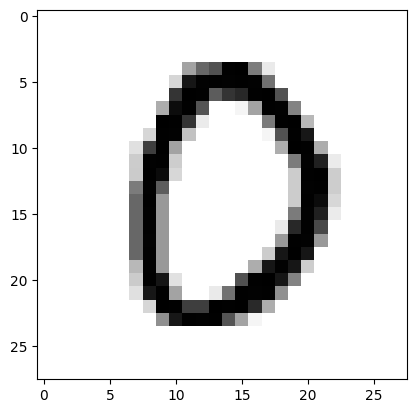

In [3]:
randomNum = random.randint(0,60000)
image = x_train.train_data[randomNum]
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

## Discriminator Network

Let’s define a CNN classifier function that takes in an image (of size 28 x 28 x 1) as input. The output will be a single scalar number activation that describes whether or not the input image is real or not. The architecture for the discriminator is as follows:
1. Convolutional Layer #1: Applies 8 3x3 filters, with ReLU activation function
2. Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
3. Convolutional Layer #2: Applies 16 3x3 filters, with ReLU activation function
4. Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
5. Dense Layer #1: 784 neurons, with dropout regularization rate of 0.2 (probability of 0.2 that any given element will be dropped during training)
6. Dense Layer #2 (Logits Layer): 32 neurons to predict the probability if the input image is real.

In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 8, (3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(2),
            nn.Conv2d(8, 16, (3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(2),
        )
        self.linear_block = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(7*7*16, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid(),
        )

    # weight_init
    def weight_init(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.normal_(m.weight.data, std=0.02)
                init.constant_(m.bias.data, val=0)

    def forward(self, img):
        x = self.conv_block(img)
        x = x.view(-1, 7*7*16)
        x = self.linear_block(x)
        return x

## Generator Network
Now that we have our discriminator defined, let’s take a look at the generator module. The generator seeks to take a d-dimensional noise vector and upsample it to become a 28 x 28 image. This upsampling is done through a convolutional transpose (or deconvolution) layer. ReLUs and Batch Norm are then used to stabilize the outputs of each layer.

The structure of the generator is very similar to that of the discriminator, except we're calling the convolution transpose method, instead of the conv2d one.

The conv transpose + relu + batch norm pipeline is repeated 4 times so that the output volume grows larger and larger until a 28 x 28 x 1 image is formed.

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.deconv_block = nn.Sequential(
            nn.ConvTranspose2d(4, 256, (3, 3), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, (4, 4), stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, (4, 4), stride=2, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, (4, 4), stride=2, padding=1),
            nn.Tanh(),
        )

    # weight_init
    def weight_init(self):
        for m in self.modules():
            if isinstance(m, nn.ConvTranspose2d):
                init.normal_(m.weight.data, std=0.1)
                init.constant_(m.bias.data, val=0.1)

    def forward(self, z):
        z = z.reshape(-1, 4, 5, 5)
        x = self.deconv_block(z)

        return x

z -> 0.2 0.2

X -> 0.8 0.1 0.2 0.4 0.8

## Generating a Sample Image

We’ve defined both the generator and discriminator functions. Let’s see what a sample output from an untrained generator looks like. The noise vector is set to be 100 dimension. With a batch size of 64, the input to the generator would be 64 x 100. The initial generated digit is shown below. Not a very convincing MNIST digit right? In the next section, we'll look at how we can make our generator better.

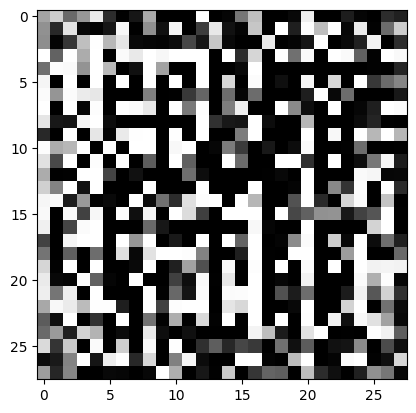

In [7]:
z_dimensions = 100
test_z = torch.randn(z_dimensions)-1
generator = Generator()
generator.weight_init()
generator.eval()
temp = generator(test_z)

my_i = temp.squeeze()
plt.imshow(np.array(my_i.data), cmap='gray_r')
plt.show()

batch_size = 64
learning_rate = 0.001
epochs = 1
train_loader = torch.utils.data.DataLoader(x_train, batch_size=batch_size, shuffle=True)
# Binary Cross Entropy loss
BCE_loss = nn.BCELoss()

discriminator = Discriminator()
discriminator.weight_init()

# Adam optimizer
g_optim = optim.Adam(generator.parameters(), lr=learning_rate)
d_optim = optim.Adam(discriminator.parameters(), lr=learning_rate/5)

Now the best part of neural networks, the algorithm of training loop. During every iteration, there will be two updates being made, one to the discriminator and one to the generator. For the generator update, we’ll feed in a random z vector to the generator and pass that output to the discriminator to obtain a probability score (this is the Dg variable we specified earlier). As we remember from our loss function, the cross entropy loss gets minimized, and only the generator’s weights and biases get updated.

We'll do the same for the discriminator update. We’ll be taking a batch of images from the mnist dataset as the positive examples, while the images generated by the Generator are the negative ones. (It might take several minutes to run. Set 'epochs' to be smaller if you hope to see a primary results with less time!)

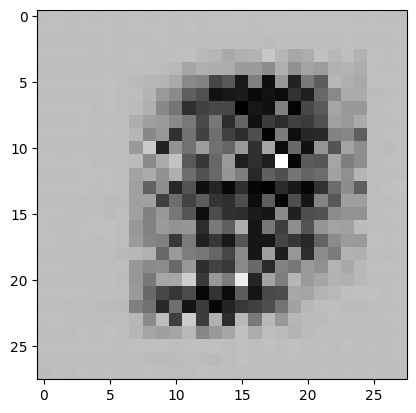

In [8]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        generator.cuda()
        discriminator.cuda()

    generator.train()
    discriminator.train()
    for x_batch, _ in train_loader:
        # train discriminator
        discriminator.zero_grad()

        mini_batch = x_batch.size()[0]
        z_batch = torch.randn(mini_batch * z_dimensions)-1
        y_real = torch.ones(mini_batch)
        y_fake = torch.zeros(mini_batch)

        if torch.cuda.is_available():
            x_batch, z_batch, y_real, y_fake = \
                x_batch.cuda(), z_batch.cuda(), y_real.cuda(), y_fake.cuda()

        x_batch, z_batch, y_real, y_fake = Variable(x_batch), Variable(z_batch), Variable(y_real), Variable(y_fake)

        d_result = discriminator(x_batch).squeeze()
        d_real_loss = BCE_loss(d_result, y_real)

        g_result = generator(z_batch)
        d_result = discriminator(g_result).squeeze()
        d_fake_loss = BCE_loss(d_result, y_fake) #111111111111111111111111111111111111111111111111111111111111111----

        #------------------------ for training discriminator

        d_train_loss = d_real_loss+d_fake_loss
        d_train_loss.backward()
        d_optim.step()

#         print('d_real:{}'.format(d_real_loss))
#         print('d_fake:{}'.format(d_fake_loss))

        # train generator
        generator.zero_grad()

        z_batch = torch.randn(mini_batch * z_dimensions)-1
        if torch.cuda.is_available():
            z_batch = z_batch.cuda()

        z_batch = Variable(z_batch)

        g_result = generator(z_batch)
        d_result = discriminator(g_result).squeeze()
        g_train_loss = BCE_loss(d_result, y_real) # 00000000000000000000000000000000000000000000000000000000this is important

        # generator training

        g_train_loss.backward()
        g_optim.step()

#         print('g:{}'.format(g_train_loss))

    generator.eval().cpu()
    temp = generator(test_z)

    my_i = temp.squeeze()
    plt.imshow(np.array(my_i.data), cmap='gray_r')
    plt.show()

## Training Difficulties

One note that I’d like to make is that GANs are notoriously difficult to train. Without the right hyperparameters, network architecture, and training procedure, there is a high chance that either the generator or discriminator will overpower the other. A common case of this is the situation where the generator is able to find a flaw in the discriminator by repeatedly outputting an image that fits the data distribution the discriminator is looking for, but is nowhere close to being a readable MNIST digit. The generator has collapsed onto a single point, and therefore we won’t output a variety of digits. There are also cases where the discriminator becomes too powerful and is able to easily make the distinction between real and fake images.

The mathematical intuition behind this phenomenon lies in that GANs are typically trained using gradient descent techniques that are designed to find the minimum value of a cost function, rather than to find the Nash equilibrium of a game. When used to seek for a Nash equilibrium, these algorithms may fail to converge. Further research into game theory and stable optimization techniques may result in GANs that are as easy to train as ConvNets!

## Closing Thoughts
 With applications in video frame prediction, text-image mappings, and more, GANs are definitely the hottest topic in deep learning. Hopefully, with this tutorial, you’ve gained a better understanding of how these networks work in practice and how you can build your own with Pytorch!